In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
_pth_tst, _pth_trn = '../out/test_prediction.csv','../out/train_prediction.csv'

In [7]:
train_df = pd.read_csv(_pth_trn)
test_df = pd.read_csv(_pth_tst)

In [25]:
def error(row):
    act = row['Sale_Price']
    pred = row['Sale_Price_Predition']
    return pred-act

def mape(row):
    act = row['Sale_Price']
    pred = row['Sale_Price_Predition']
    return np.abs(pred-act)/act
    
# train
train_df['error'] = train_df.apply(error, axis=1)
train_df['mape'] = train_df.apply(mape, axis=1)
#test
test_df['error'] = train_df.apply(error, axis=1)
test_df['mape'] = train_df.apply(mape, axis=1)

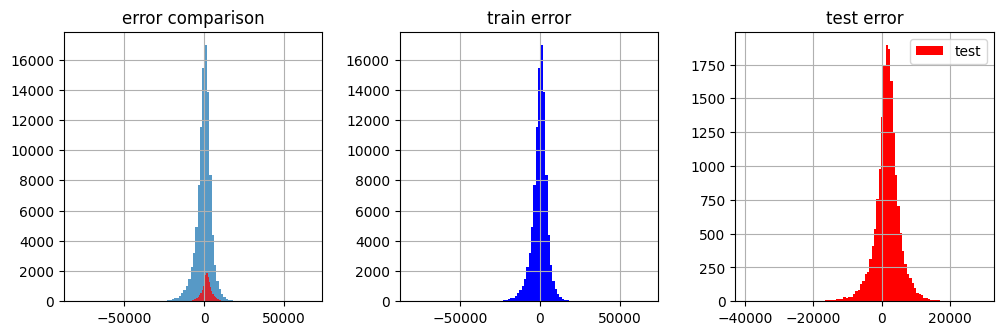

In [87]:
fig, ax = plt.subplots(ncols=3,  figsize=(12,3.5))
train_df[['error']].hist(bins=100,ax=ax[0], alpha=0.75, label='train')
test_df[['error']].hist(bins=100,ax=ax[0], alpha=0.75,color='r', label='test')
train_df[['error']].hist(bins=100,ax=ax[1], alpha=1, color='b', label='train')
test_df[['error']].hist(bins=100,ax=ax[2], alpha=1, color='r', label='test')
ax[0].set_title(label='error comparison')
ax[1].set_title(label='train error')
ax[2].set_title(label='test error')

plt.legend()
fig.savefig('./imgs/error_comp.png')
plt.show()

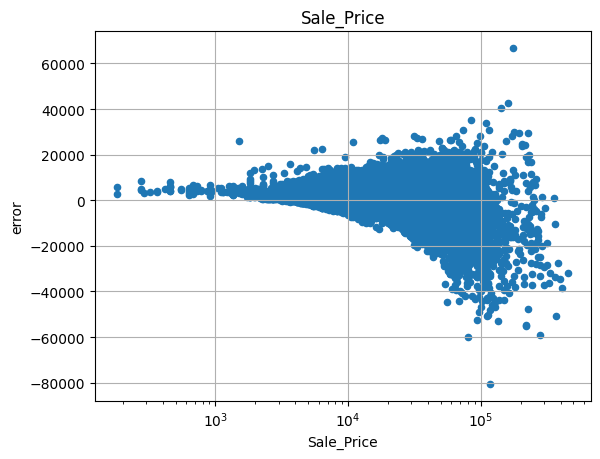

In [86]:
cols = ['Odometer', 'Power', 'Fuel_Urban', 'inventory_days', 'age_sell_day',
       'km_per_day', 'fuel_per_power', 'odo_per_fuel', 'odo_per_power',
       'pow_times_odo', 'sld_wknum', 'adv_wknum', 'Make_Code_embedding_0',
       'Make_Code_embedding_1', 'Family_Code_embedding_0',
       'Family_Code_embedding_1', 'Region_Description_embedding_0',
       'Region_Description_embedding_1', 'Sale_Price']

c = cols[18]
train_df.plot.scatter(y='error', x=c, title=c,grid=True, logx=True)
plt.show()